<a href="https://colab.research.google.com/github/ankitashrivastav12/ML-MODELS/blob/main/Program_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:08<00:00, 145MB/s]
100% 1.06G/1.06G [00:08<00:00, 127MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
conv_base.trainable = False

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

<ipython-input-10-b2b64d53260b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
625/625 [==============================] - 166s 252ms/step - loss: 0.3103 - accuracy: 0.8662 - val_loss: 0.2165 - val_accuracy: 0.9070
Epoch 2/10
625/625 [==============================] - 149s 239ms/step - loss: 0.2377 - accuracy: 0.8986 - val_loss: 0.2090 - val_accuracy: 0.9092
Epoch 3/10
625/625 [==============================] - 148s 237ms/step - loss: 0.2245 - accuracy: 0.9046 - val_loss: 0.2000 - val_accuracy: 0.9148
Epoch 4/10
625/625 [==============================] - 148s 237ms/step - loss: 0.2136 - accuracy: 0.9094 - val_loss: 0.1944 - val_accuracy: 0.9182
Epoch 5/10
625/625 [==============================] - 149s 239ms/step - loss: 0.2065 - accuracy: 0.9120 - val_loss: 0.1934 - val_accuracy: 0.9178
Epoch 6/10
625/625 [==============================] - 148s 237ms/step - loss: 0.1975 - accuracy: 0.9153 - val_loss: 0.2122 - val_accuracy: 0.9104
Epoch 7/10
625/625 [==============================] - 148s 237ms/step - loss: 0.1927 - accuracy: 0.9183 - val_loss: 0.1949 -

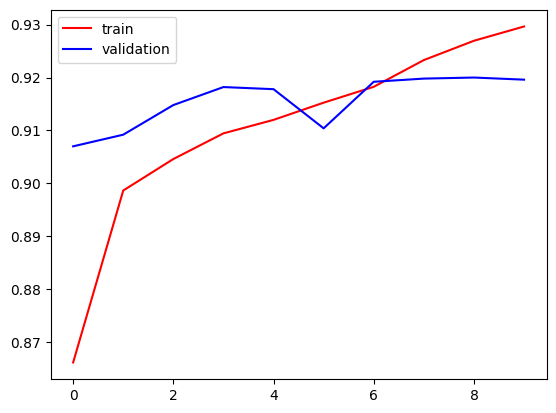

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

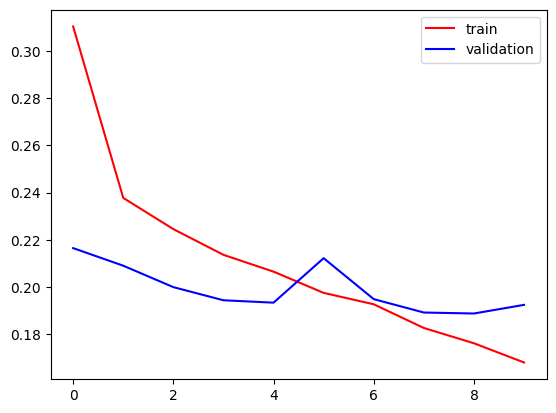

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()